In [1]:
import cv2 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
img = cv2.imread('/Users/hongjowell/parking/parkinglot.jpeg')

In [3]:
y = 149
x = 142
i = 0

In [4]:
model = tf.keras.models.load_model("/Users/hongjowell/parking/Model/saved_model.h5")

from tensorflow.keras.applications.vgg16 import VGG16
HEIGHT = 49
WIDTH = 37

2022-04-06 09:27:22.297435: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


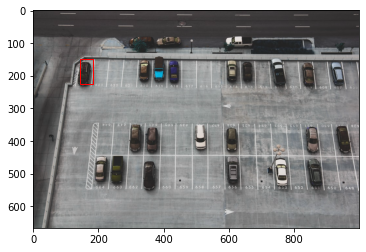

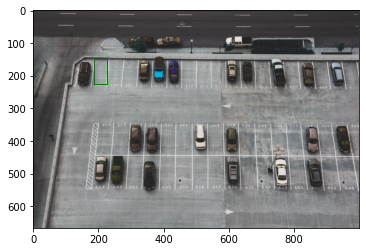

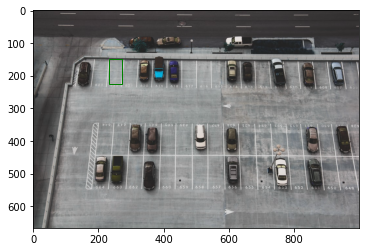

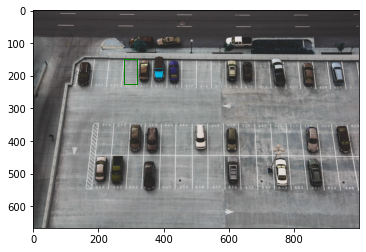

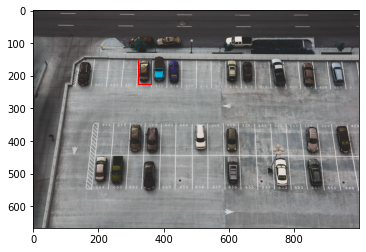

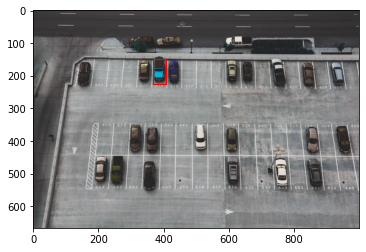

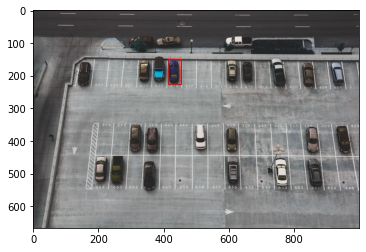

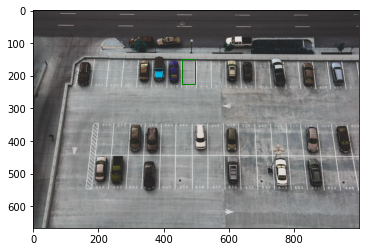

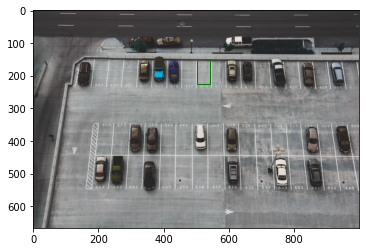

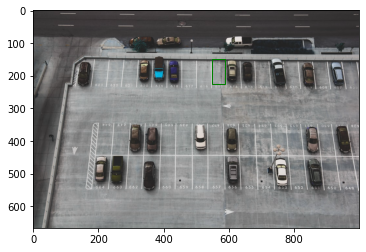

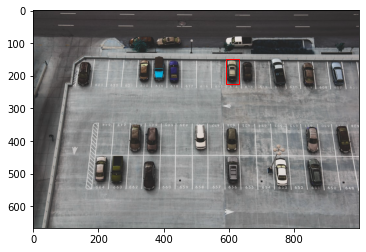

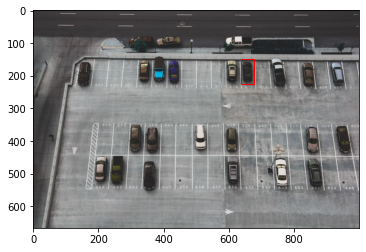

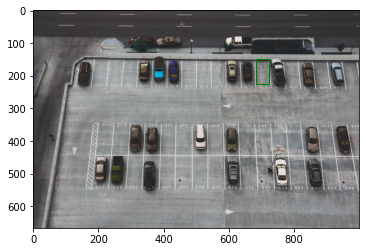

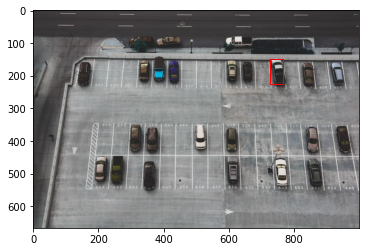

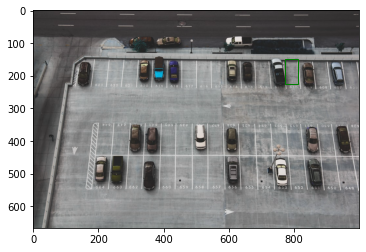

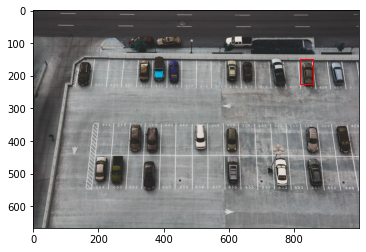

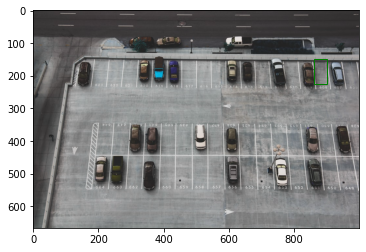

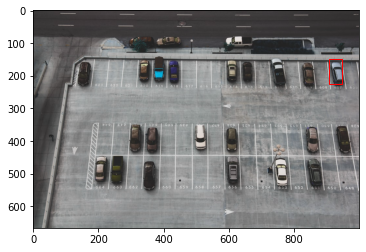

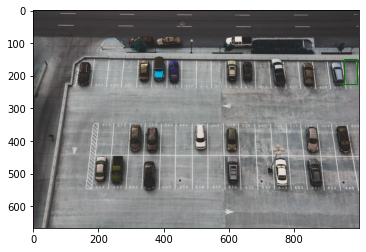

In [5]:
for i in range (19):
    cropped_image = img [y:y+85, x:x+45]
    image = cv2.resize(cropped_image, (WIDTH, HEIGHT))
    image_x = np.expand_dims(image, axis=0)
    image_x = tf.keras.applications.vgg16.preprocess_input(image_x)
    prediction = model.predict(image_x)
    prediction = np.squeeze(prediction)
    
    fig, ax = plt.subplots()
    ax.imshow(img)
    if prediction> 0.8:

        rect = patches.Rectangle((x, y),40, 75, linewidth=1, edgecolor='r', facecolor='none')

    else:

        rect = patches.Rectangle((x, y),40, 75, linewidth=1, edgecolor='g', facecolor='none')

        
    ax.add_patch(rect)
    x = x+45

plt.show() 